In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

In [2]:
Bang_data = pd.read_csv("Bengaluru_House_Data.csv")
data = Bang_data.copy()

In [3]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
#Describe to check the std deviatin and more anout the data
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),' % missing values')

size 0.0012  % missing values
society 0.4131  % missing values
bath 0.0055  % missing values
balcony 0.0457  % missing values


In [7]:
np.round(data["society"].isnull().mean(),4)

0.4131

In [8]:
#Here I drop society which contains more than 40% of null values 

data.drop(["society"], axis = 1, inplace = True)
data.shape

(13320, 8)

In [9]:
#mode value to impute the null 

data["size"].mode()

0    2 BHK
dtype: object

C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


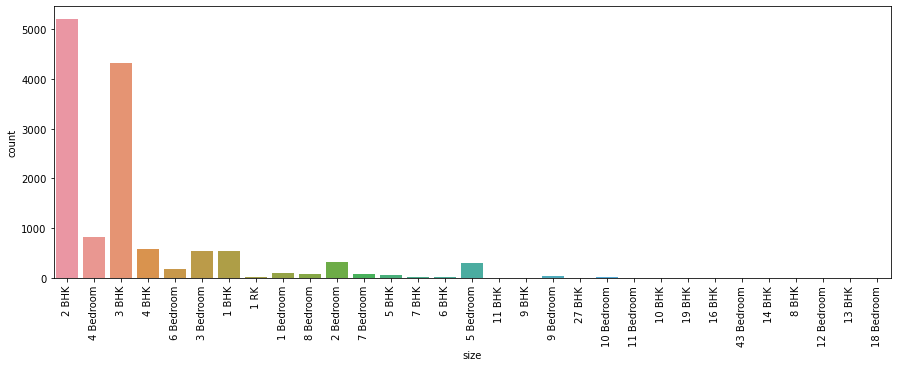

In [10]:
#Here I plot the countplot basically to know about that how much 2 bhk higher than the other

plt.figure(figsize = (15,5))
sns.countplot("size", data=data)
plt.xticks(rotation=90)


plt.show()

In [11]:
data["size"] = data["size"].fillna(data["size"].mode()[0])
print(data["size"].isnull().sum())

0


Total null values is 73


C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


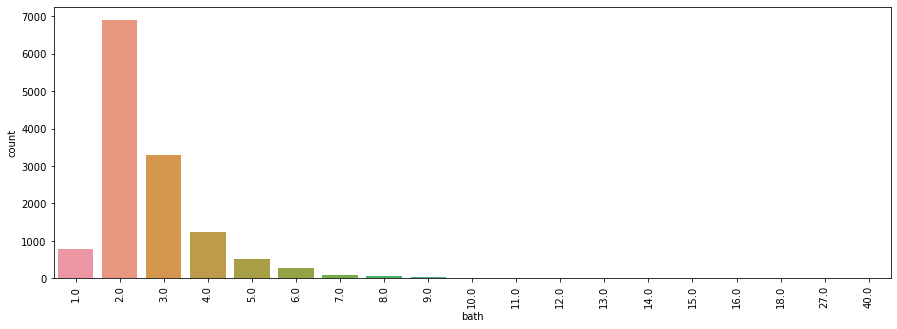

In [12]:
print("Total null values is", data["bath"].isnull().sum())

plt.figure(figsize = (15,5))
sns.countplot("bath", data=data)
plt.xticks(rotation=90)


plt.show()

In [13]:
data["bath"] = data["bath"].fillna(data["bath"].mode()[0])
print(data["bath"].isnull().sum())

0


Total null values is 609


C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


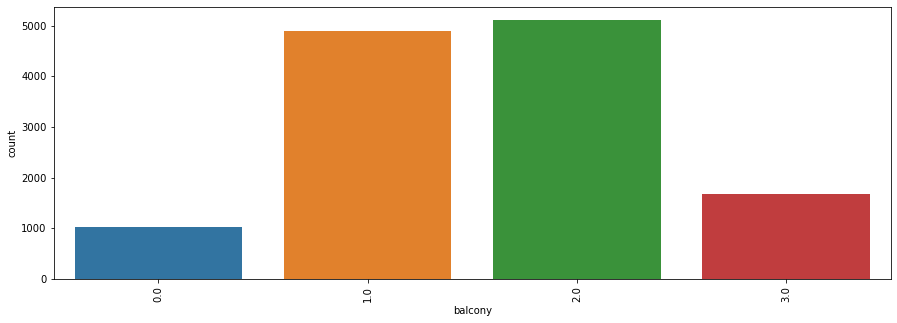

In [14]:
print("Total null values is", data["balcony"].isnull().sum())

plt.figure(figsize = (15,5))
sns.countplot("balcony", data=data)
plt.xticks(rotation=90)


plt.show()


In [15]:
print(data["balcony"].mode())
print(data["balcony"].median())
print(data["balcony"].mean())

0    2.0
dtype: float64
2.0
1.5843757375501535


In [16]:
numerical_features= data.select_dtypes(include = "float64")
numerical_features.head(1)

,bath,balcony,price
0,2.0,1.0,39.07


In [17]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 ]

discrete_feature

['bath', 'balcony']

In [18]:
categ_feature = data.select_dtypes(include = "object")
categ_feature.head(1)

,area_type,availability,location,size,total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056


In [19]:
print(numerical_features.isnull().sum())
print(categ_feature.isnull().sum())

bath         0
balcony    609
price        0
dtype: int64
area_type       0
availability    0
location        1
size            0
total_sqft      0
dtype: int64


In [20]:
data["total_sqft"].value_counts()

1200           843
1100           221
1500           205
2400           196
600            180
              ... 
2920             1
2795             1
1617             1
1113.12          1
1791 - 4000      1
Name: total_sqft, Length: 2117, dtype: int64

In [21]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    #print('\n')
    print('__________________________________________________________________________________________\n')

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
__________________________________________________________________________________________

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Jun               1
14-Jul               1
15-Dec               1
16-Jan               1
16-Nov               1
Name: availability, Length: 81, dtype: int64
__________________________________________________________________________________________

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Nanjappa Layout Vidyaranyapura      1
Rukmaiah Layout                     1
RK Colony                           

In [22]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_row",None)
data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
data["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [24]:
#for splitting numerical data from bhk and other str values
#data['size'].apply(lambda x : int(x.split()[0]))

In [25]:
#for splitting numerical data from bhk and other str values
#size_int = []
#for str_val in data["size"]:
    #temp = []
    #temp = str_val.split(" ")
    #try:
        #size_int.append(int(temp[0]))
    #except:
        #size_int.append(int(temp[0]))
        #print("Noice = ", str_val)

#### Outlier

#### 1st Techinique

In [26]:
#Explore samples that are above 99.90% percentile and below 1% percentile rank

#min_thresold, max_thresold = df.price_per_sqft.quantile([0.001, 0.999])
#min_thresold, max_thresold

#df[df.price_per_sqft < min_thresold]

In [27]:
#df[df.price_per_sqft > max_thresold]

In [28]:
#Remove outliers

#df2 = df[(df.price_per_sqft<max_thresold) & (df.price_per_sqft>min_thresold)]
#df2.shape


#### 2nd Technique

<ipython-input-29-1fcde057b343>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features[feature]=np.log(numerical_features[feature])


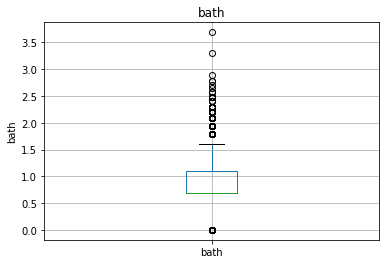

<ipython-input-29-1fcde057b343>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features[feature]=np.log(numerical_features[feature])


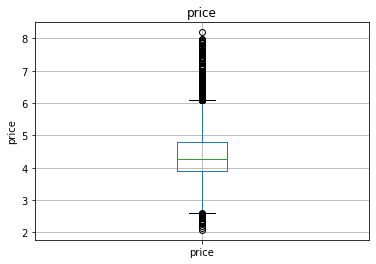

In [29]:
for feature in numerical_features:
    data_copy=numerical_features.copy()
    if 0 in numerical_features[feature].unique():
        pass
    else:
        numerical_features[feature]=np.log(numerical_features[feature])
        numerical_features.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [30]:
data.head(4)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00


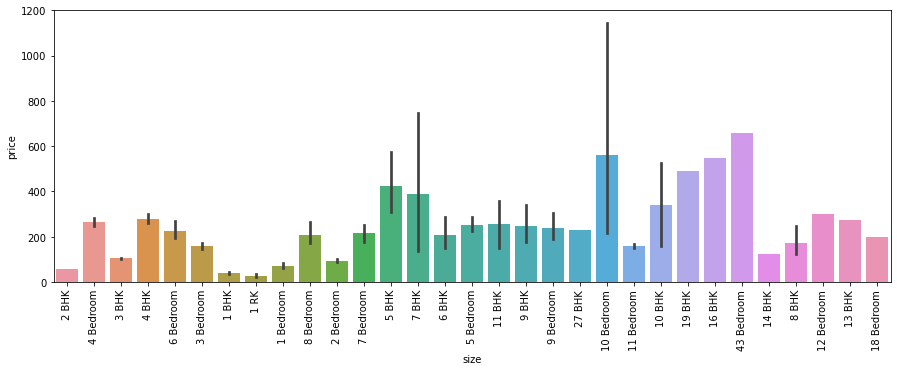

In [31]:
plt.figure(figsize = (15,5))

ax = sns.barplot(x="size", y="price", data=data)
plt.xticks(rotation=90)

plt.show()

`We can clearly see here some of the house have more than 10 bedroom or greater than 10 bhk and having 
smaller area (total_sqft), so they are  basically outliers`

#### Deep dive into total_sqft data

In [32]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
data[~data['total_sqft'].apply(is_float)]

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3010 - 3410,2.0,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,2957 - 3450,2.0,NaN,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,1520 - 1740,2.0,NaN,74.820
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770


* Here we can see that the vallues in size are different in units and form of rang.
* Converting range by there average value or mean.
* For values with different units, converting them to square foot by unit conversion..

In [33]:

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
            
            
            #strings = ['Sq. Meter', 'Sq. Yards', 'Perch', 'Acres', 'Cents', 'Guntha', 'Grounds']
            #split_list = re.split('(\d*.*\d)', x[0])[1:]
            #area = float(x[0])
            #type_of_area = x[1]
            
            #if type_of_area == 'Sq. Meter':
                #area_in_sqft = area * 10.7639
            #elif type_of_area == 'Sq. Yards':
                #area_in_sqft = area * 9.0
            #elif type_of_area == 'Perch':
                #area_in_sqft = area * 272.25
            #elif type_of_area == 'Acres':
                #area_in_sqft = area * 43560.0
            #elif type_of_area == 'Cents':
                #area_in_sqft = area * 435.61545
            #elif type_of_area == 'Guntha':
                #area_in_sqft = area * 1089.0
            #elif type_of_area == 'Grounds':
                #area_in_sqft = area * 2400.0
            #return float(area_in_sqft)
    #else:
        #return (float(x[0]) + float(x[1]))/2.0        

In [34]:
df = data.copy()
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]
df.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00


In [35]:
df.loc[30]

area_type       Super built-up  Area
availability                  19-Dec
location                   Yelahanka
size                           4 BHK
total_sqft                      2475
bath                               4
balcony                            0
price                            186
Name: 30, dtype: object

In [36]:
df.loc[409:411,:]

,area_type,availability,location,size,total_sqft,bath,balcony,price
409,Plot Area,Ready To Move,Sultan Palaya,2 Bedroom,550.0,1.0,1.0,62.0
411,Super built-up Area,Ready To Move,Sanne Amanikere,2 BHK,1185.0,2.0,NaN,38.0


### Feature Engineering

In [37]:
df1 = df.copy()

In [38]:
df1["BHK_Bedroom"] = df1['size'].apply(lambda x : int(x.split()[0]))
df1.head()
 

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Bedroom
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [39]:
df1[df1.BHK_Bedroom>10]

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Bedroom
459,Super built-up Area,Ready To Move,1 Giri Nagar,11 BHK,5000.0,9.0,3.0,360.0,11
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000.0,27.0,0.0,230.0,27
1768,Plot Area,Ready To Move,1 Ramamurthy Nagar,11 Bedroom,1200.0,11.0,0.0,170.0,11
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19 BHK,2000.0,16.0,NaN,490.0,19
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16 BHK,10000.0,16.0,NaN,550.0,16
3853,Plot Area,Ready To Move,1 Annasandrapalya,11 Bedroom,1200.0,6.0,3.0,150.0,11
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400.0,40.0,0.0,660.0,43
4916,Super built-up Area,Ready To Move,1Channasandra,14 BHK,1250.0,15.0,0.0,125.0,14
6533,Plot Area,Ready To Move,Mysore Road,12 Bedroom,2232.0,6.0,2.0,300.0,12
7979,Super built-up Area,Ready To Move,1 Immadihalli,11 BHK,6000.0,12.0,NaN,150.0,11


In [40]:
df1["Price_per_sqft"]=df1["price"]*100000/df1["total_sqft"]
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [41]:
df1["Price_per_sqft"].describe().apply(lambda x: format(x, 'f'))

count       13274.000000
mean         7907.501200
std        106429.594781
min           267.829813
25%          4266.864525
50%          5434.306291
75%          7311.746063
max      12000000.000000
Name: Price_per_sqft, dtype: object

min price per sqft is **267 rs/sqft** whereas max is **12000000**, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [42]:
len(df1.location.unique())

1300

location is categoricat feature so if we convert into dummies variable then will be the case of 
`dimensionality curse`

In [43]:
loaction_stat = df1.groupby('location')['location'].agg('count').sort_values(ascending =False)
print(loaction_stat)


location
Whitefield                                            538
Sarjapur  Road                                        399
Electronic City                                       302
Kanakpura Road                                        271
Thanisandra                                           233
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Hennur Road                                           152
Bannerghatta Road                                     151
7th Phase JP Nagar                                    148
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bella

In [44]:
print(len(loaction_stat[loaction_stat<=10]))

1059


In [45]:
location_under10 = loaction_stat[loaction_stat<=10]

In [46]:
df1.loaction = df1.location.apply(lambda x:"others" if x in location_under10 else x)

<ipython-input-46-4335cd8c1e02>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.loaction = df1.location.apply(lambda x:"others" if x in location_under10 else x)


In [47]:
len(df1.loaction.unique())

242

Previosly we have 1300 unique location, now after converting 

### Removing of outliers

In [48]:
df1[df1.total_sqft/df1.BHK_Bedroom<300].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020.0,6.0,NaN,370.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600.0,9.0,NaN,200.0,8,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,Double Road,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


Here 6 bhk with 1020 sqft and 8 bhk with 600 sqft are unusual, these are the data errors
which shoulhd be removed safely

In [49]:
print(len(df1[df1.total_sqft/df1.BHK_Bedroom<300]))
print(df1.shape)

744
(13274, 10)


In [50]:
df2 = df1[~(df1.total_sqft/df1.BHK_Bedroom<300)]
df2.shape                                        # Here we removed some ouliers

(12530, 10)

In [51]:
df2.Price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_sqft, dtype: float64

min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [52]:

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.shape

(9316, 10)

#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

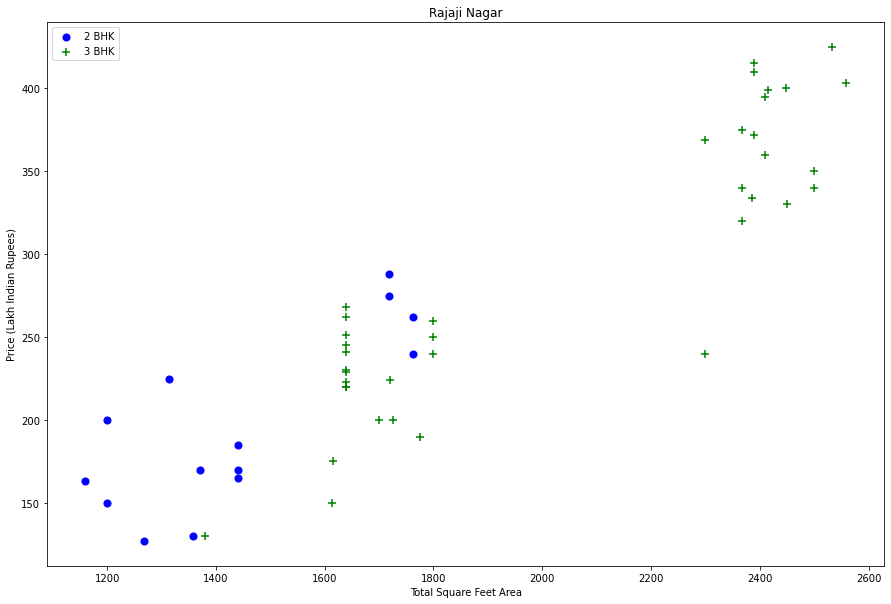

In [53]:

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK_Bedroom==2)]
    bhk3 = df[(df.location==location) & (df.BHK_Bedroom==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df3,"Rajaji Nagar")

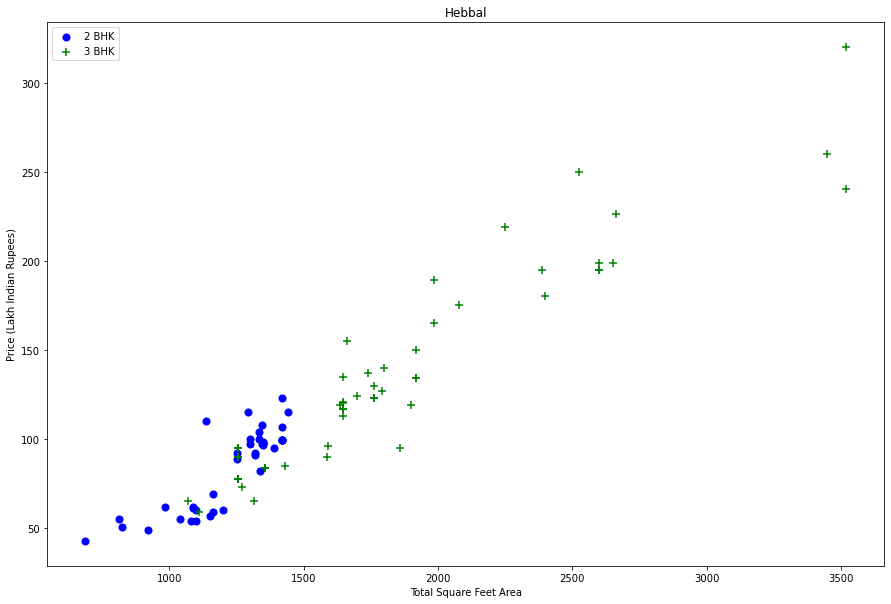

In [54]:
plot_scatter_chart(df3,"Hebbal")


We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

In [55]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK_Bedroom'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_per_sqft),
                'std': np.std(bhk_df.Price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK_Bedroom'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)

df4.shape

(7539, 10)


Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

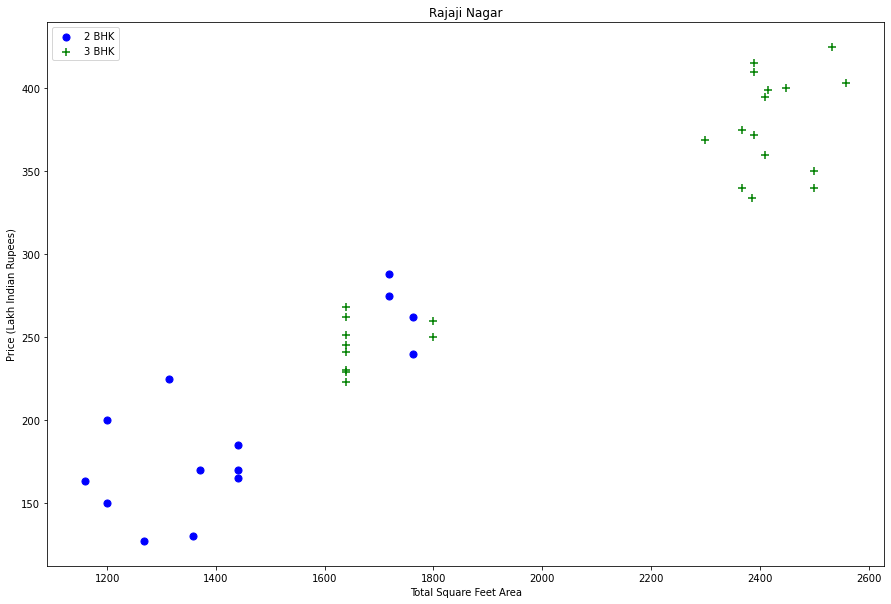

In [56]:
plot_scatter_chart(df4,"Rajaji Nagar")

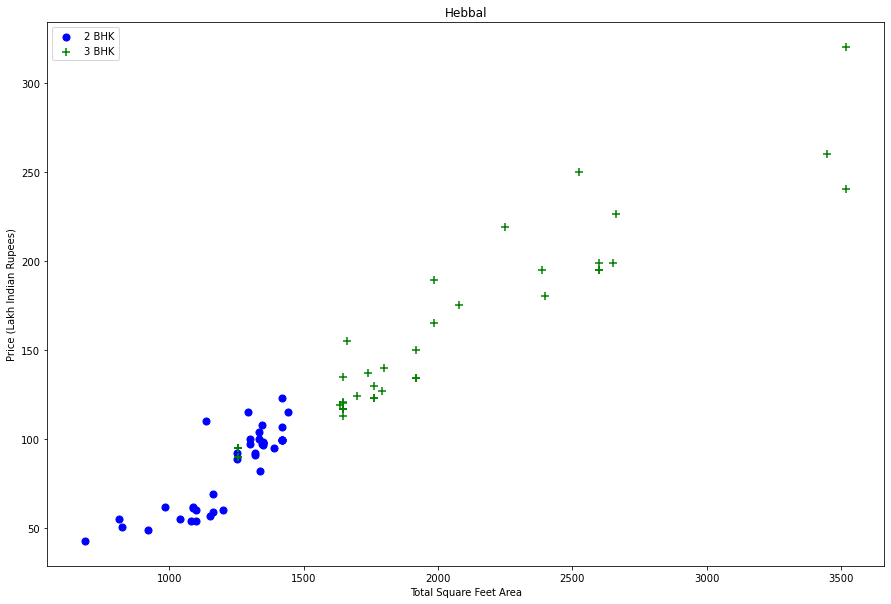

In [57]:
plot_scatter_chart(df4,"Hebbal")

In [58]:
df4[df4.bath>10]

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft
779,Plot Area,Ready To Move,BTM 1st Stage,9 Bedroom,3300.0,14.0,NaN,500.0,9,15151.515152
6219,Super built-up Area,Ready To Move,Neeladri Nagar,10 BHK,4000.0,12.0,NaN,160.0,10,4000.000000


In [59]:
df4[df4.bath>df4.BHK_Bedroom+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft
779,Plot Area,Ready To Move,BTM 1st Stage,9 Bedroom,3300.0,14.0,NaN,500.0,9,15151.515152
1985,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6153,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000.0,8.0,NaN,450.0,4,6428.571429
7478,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689
7958,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330


Now here we can see the number of bathrooms are really high when we compare with the BHK and Total_sqft, so these are basically the outliers.

In [60]:
Outliers = df4[df4.bath>df4.BHK_Bedroom+2]
df5 = df4.drop(Outliers.index)
print(df4.shape)
print(df5.shape)

(7539, 10)
(7534, 10)


In [61]:
print("Unique Values", df5.balcony.unique())
print("Value Counts")
print(df5.balcony.value_counts())
print("Null Values", df5.balcony.isnull().sum())

Unique Values [ 2.  3.  1.  0. nan]
Value Counts
1.0    2991
2.0    2958
3.0     824
0.0     507
Name: balcony, dtype: int64
Null Values 254


C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

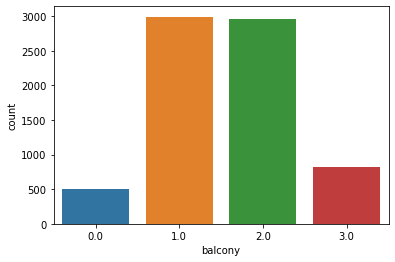

In [62]:
plt.figure(figsize =(6, 4))
sns.countplot(df5["balcony"])
plt.plot

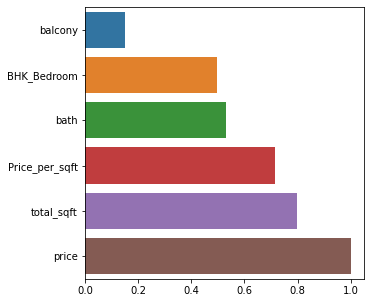

In [63]:
plt.figure(figsize=(5,5))
corr_feat_series = pd.Series.sort_values(df5.corrwith(df5.price))
sns.barplot(x=corr_feat_series, y=corr_feat_series.index,orient = 'h')
plt.show()

#### Impute missing values with KNN Imputer

In [64]:
#from sklearn.model_selection import train_test_split
#X = df5.drop(["price"], axis = 1)
#y = df5["price"]
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 5)

In [65]:
#from sklearn.impute import KNNImputer

In [66]:
#knn = KNNImputer(n_neighbors = 2, add_indicator = True) 

In [67]:
#num = [col for col in X_train.columns if X_train[col].dtypes!='O']

In [68]:
#X_train[num].head()

In [69]:
#knn.fit(X_train[num])

In [70]:
#knn.transform(X_train[num])

In [71]:
#pd.DataFrame(knn.transform(X_train[num])).head()

In [72]:
#pd.DataFrame(knn.transform(X_train[num])).isnull().sum().sum()

In [73]:
#X_test[num].isna().sum()

In [74]:
#knn.transform(X_test[num])

In [75]:
#pd.DataFrame(knn.transform(X_test[num])).isna().sum().sum()

In [76]:
#Test_impute = pd.DataFrame(knn.transform(X_test[num]))

In [77]:
#Train_impute = pd.DataFrame(knn.transform(X_train[num]))
#Train_impute.head(50)

In [78]:
#df4[num].head(50)

In [79]:
df5["balcony"]=df5["balcony"].fillna(df5["balcony"].mode()[0])
df5.isnull().sum().sum()

0

In [80]:
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672.0,3.0,2.0,150.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750.0,3.0,3.0,149.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750.0,3.0,2.0,150.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667


In [81]:
df5["area_type"].value_counts()

Super built-up  Area    5572
Built-up  Area          1391
Plot  Area               528
Carpet  Area              43
Name: area_type, dtype: int64

In [82]:
df5["availability"].value_counts()

Ready To Move           5969
18-Dec                   167
18-May                   164
18-Apr                   156
18-Aug                   125
19-Dec                   109
18-Mar                    84
18-Jul                    84
21-Dec                    61
20-Dec                    53
18-Jun                    52
19-Mar                    46
18-Feb                    38
18-Nov                    28
18-Oct                    25
18-Sep                    22
19-Jun                    21
18-Jan                    20
19-Jan                    20
20-Jan                    18
17-Dec                    16
21-Mar                    13
19-Sep                    13
21-Jun                    13
17-Oct                    13
19-Aug                    12
19-Jul                    11
17-Jul                    10
21-Jan                    10
17-Jun                     9
19-Apr                     9
19-Oct                     9
20-Oct                     7
22-Dec                     7
20-Jun        

In [83]:
def Availability(x):
    values = x.split("-")
    try:
        if len(values) > 1:
            return "Finish soon"
        else:
            return x
    except:
            return ""

In [84]:
df5["availability"] = df5["availability"].apply(Availability)

In [85]:
df5["availability"].value_counts()

Ready To Move           5969
Finish soon             1562
Immediate Possession       3
Name: availability, dtype: int64

In [86]:
 df5["Price_per_sqft"].max()

35000.0

In [87]:
df2["Price_per_sqft"].min()

267.82981328435875

In [88]:
df5.sort_values(by = "Price_per_sqft", ascending = False).head(50)

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft
2131,Plot Area,Ready To Move,Defence Colony,6 Bedroom,8000.0,6.0,3.0,2800.0,6,35000.000000
689,Super built-up Area,Finish soon,Ashok Nagar,4 BHK,8321.0,5.0,2.0,2912.0,4,34995.793775
7665,Super built-up Area,Ready To Move,Srinivas Colony,3 BHK,2750.0,3.0,2.0,943.0,3,34290.909091
8352,Plot Area,Ready To Move,Vasanth nagar,6 Bedroom,2295.0,3.0,0.0,650.0,6,28322.440087
89,Plot Area,Ready To Move,3rd Block Banashankari,6 Bedroom,2400.0,8.0,2.0,650.0,6,27083.333333
6831,Plot Area,Ready To Move,Rajarajeshwarinagar,4 Bedroom,1200.0,5.0,1.0,325.0,4,27083.333333
2302,Plot Area,Ready To Move,Dollars Colony,3 Bedroom,7800.0,3.0,2.0,2000.0,3,25641.025641
3065,Plot Area,Ready To Move,HAL 2nd Stage,5 Bedroom,2040.0,4.0,1.0,500.0,5,24509.803922
3063,Plot Area,Finish soon,HAL 2nd Stage,2 Bedroom,600.0,3.0,2.0,145.0,2,24166.666667
2096,Plot Area,Ready To Move,Cunningham Road,4 Bedroom,7500.0,6.0,2.0,1800.0,4,24000.000000


C:\Users\myks7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


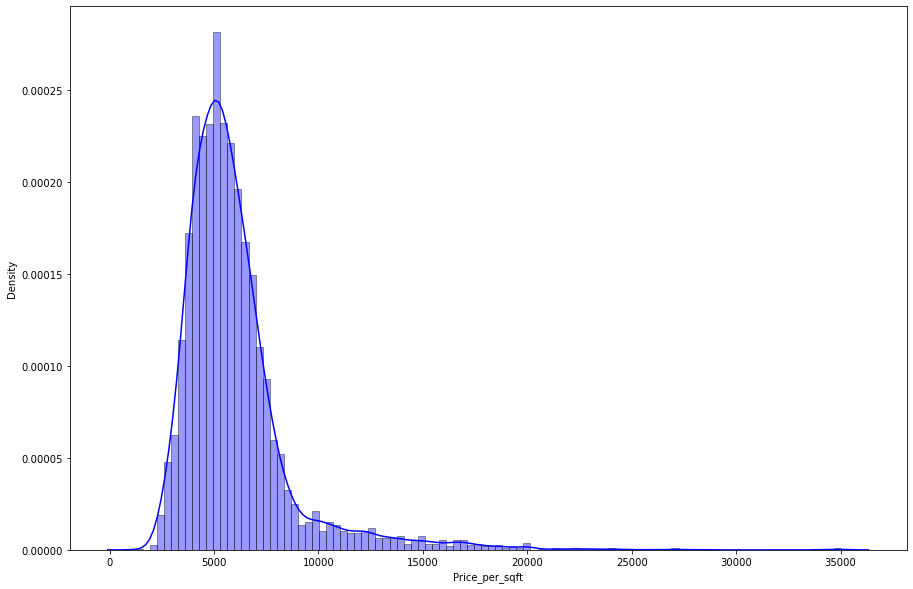

In [89]:

sns.distplot(df5["Price_per_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.show()

In [90]:
df5.corr()["price"].sort_values(ascending=False)

price             1.000000
total_sqft        0.797764
Price_per_sqft    0.713804
bath              0.530869
BHK_Bedroom       0.497521
balcony           0.108908
Name: price, dtype: float64

In [91]:
len(df5.location.unique())

765

In [92]:
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672.0,3.0,2.0,150.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750.0,3.0,3.0,149.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750.0,3.0,2.0,150.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667


In [93]:
df5["location"].value_counts()

Whitefield                             246
Sarjapur  Road                         195
Electronic City                        161
Raja Rajeshwari Nagar                  140
Uttarahalli                            120
Haralur Road                           117
Marathahalli                           116
Bannerghatta Road                      109
Hennur Road                            109
Thanisandra                            103
Hebbal                                  99
Kanakpura Road                          94
Electronic City Phase II                93
Yelahanka                               87
7th Phase JP Nagar                      86
Bellandur                               73
KR Puram                                65
Chandapura                              62
Harlur                                  60
Sarjapur                                58
Banashankari                            54
Kasavanhalli                            53
Begur Road                              52
Rajaji Naga

In [94]:
cat_df5 = df5.select_dtypes(include = "O")

In [95]:
df5["Price_per_sqft"].describe()

count     7534.000000
mean      5984.144819
std       2661.892046
min       1250.000000
25%       4425.551949
50%       5447.412452
75%       6666.666667
max      35000.000000
Name: Price_per_sqft, dtype: float64

In [96]:
cat_df5.head()

,area_type,availability,location,size
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom


In [97]:
cat_df5.drop(["size"], axis = 1, inplace = True)

C:\Users\myks7\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [98]:
cat_df5.head()

,area_type,availability,location
0,Super built-up Area,Ready To Move,Devarabeesana Halli
1,Built-up Area,Ready To Move,Devarabeesana Halli
2,Super built-up Area,Ready To Move,Devarabeesana Halli
4,Super built-up Area,Ready To Move,Devarachikkanahalli
5,Plot Area,Ready To Move,Devarachikkanahalli


#### One Hot Encoding For Location

In [99]:

dummies = pd.get_dummies(cat_df5, drop_first = True)
dummies.head(3)

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Immediate Possession,availability_Ready To Move,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ south,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Arekere Mico Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_5th Stage BEML Layout,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Amarjyothi Colony,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Andrahalli,location_Anekal,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Annapurneshwari Nagar,location_Anugrah Layout,location_Anwar Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashok Nagar,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BEL Road,location_BEML Layout,location_BHEL Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Baba Nagar,location_Babusapalaya,location_Badavala Nagar,location_Bagalakunte,location_Bagalur,location_Bagalur Main Road,location_Balagere,location_Balaji Gardens Layout,location_Banagiri Nagar,location_Banashankari,location_Banashankari Stage II,location_Banashankari Stage III,location_Banashankari Stage V,location_Banashankari Stage VI,location_Banaswadi,location_Banjara Layout,location_Bank Of Baroda Colony,location_Bannerghatta,location_Bannerghatta Road,location_Basapura,location_Basava Nagar,location_Basavanagara,location_Basavanapura,location_Basavangudi,location_Basavanna Nagar,location_Basaveshwara Nagar,location_Basaveshwara Nagar Yelahanka,location_Battarahalli,location_Begur,location_Begur Road,location_Belathur,location_Belatur,location_Bellandur,location_Bellari Road,location_Bendiganahalli,location_Benson Town,location_Bethel Nagar,location_Bettahalsoor,location_Bhagyalakshmi Avenue,location_Bharathi Nagar,location_Bhoganhalli,location_Bhoopsandra,location_Bhuvaneshwari Nagar,location_Bhuvaneswari Nagar,location_Bidadi,location_Bidrahalli,location_Bikasipura,location_Bileshivale,location_Billekahalli,location_Binny Pete,location_Bisuvanahalli,location_Bommanahalli,location_Bommasandra,location_Bommasandra Industrial Area,location_Bommenahalli,location_Brindavan Layout,location_Brindavan Na

In [100]:
dummies.shape

(7534, 769)

In [101]:
df6 = pd.concat([df5,dummies], axis=1)

In [102]:
df6.shape

(7534, 779)

In [103]:
df6.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Immediate Possession,availability_Ready To Move,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ south,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Arekere Mico Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_5th Stage BEML Layout,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Amarjyothi Colony,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Andrahalli,location_Anekal,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Annapurneshwari Nagar,location_Anugrah Layout,location_Anwar Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashok Nagar,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BEL Road,location_BEML Layout,location_BHEL Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Baba Nagar,location_Babusapalaya,location_Badavala Nagar,location_Bagalakunte,location_Bagalur,location_Bagalur Main Road,location_Balagere,location_Balaji Gardens Layout,location_Banagiri Nagar,location_Banashankari,location_Banashankari Stage II,location_Banashankari Stage III,location_Banashankari Stage V,location_Banashankari Stage VI,location_Banaswadi,location_Banjara Layout,location_Bank Of Baroda Colony,location_Bannerghatta,location_Bannerghatta Road,location_Basapura,location_Basava Nagar,location_Basavanagara,location_Basavanapura,location_Basavangudi,location_Basavanna Nagar,location_Basaveshwara Nagar,location_Basaveshwara Nagar Yelahanka,location_Battarahalli,location_Begur,location_Begur Road,location_Belathur,location_Belatur,location_Bellandur,location_Bellari Road,location_Bendiganahalli,location_Benson Town,location_Bethel Nagar,location_Bettahalsoor,location_Bhagyalakshmi Avenue,location_Bharathi Nagar,location_Bhoganhalli,location_Bhoopsandra,location_Bhuvaneshwari Nagar,location_Bhuvaneswari Nagar,location_Bidadi,location_Bidrahalli,location_Bikasipura,location_Bileshivale,location_Billekahalli,location_Binny Pete,location_Bisuvanahalli,location_Bommanahalli,location_Bommasandra,location_Bom

In [104]:
cat_df5.columns

Index(['area_type', 'availability', 'location'], dtype='object')

In [105]:
df6.drop(['area_type', 'availability', 'location'], axis = 1, inplace = True)

In [106]:
df6.shape

(7534, 776)

In [107]:
df6.head()

,size,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Immediate Possession,availability_Ready To Move,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ south,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Arekere Mico Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_5th Stage BEML Layout,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Amarjyothi Colony,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Andrahalli,location_Anekal,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Annapurneshwari Nagar,location_Anugrah Layout,location_Anwar Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashok Nagar,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BEL Road,location_BEML Layout,location_BHEL Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Baba Nagar,location_Babusapalaya,location_Badavala Nagar,location_Bagalakunte,location_Bagalur,location_Bagalur Main Road,location_Balagere,location_Balaji Gardens Layout,location_Banagiri Nagar,location_Banashankari,location_Banashankari Stage II,location_Banashankari Stage III,location_Banashankari Stage V,location_Banashankari Stage VI,location_Banaswadi,location_Banjara Layout,location_Bank Of Baroda Colony,location_Bannerghatta,location_Bannerghatta Road,location_Basapura,location_Basava Nagar,location_Basavanagara,location_Basavanapura,location_Basavangudi,location_Basavanna Nagar,location_Basaveshwara Nagar,location_Basaveshwara Nagar Yelahanka,location_Battarahalli,location_Begur,location_Begur Road,location_Belathur,location_Belatur,location_Bellandur,location_Bellari Road,location_Bendiganahalli,location_Benson Town,location_Bethel Nagar,location_Bettahalsoor,location_Bhagyalakshmi Avenue,location_Bharathi Nagar,location_Bhoganhalli,location_Bhoopsandra,location_Bhuvaneshwari Nagar,location_Bhuvaneswari Nagar,location_Bidadi,location_Bidrahalli,location_Bikasipura,location_Bileshivale,location_Billekahalli,location_Binny Pete,location_Bisuvanahalli,location_Bommanahalli,location_Bommasandra,location_Bommasandra Industrial Area,locatio

In [108]:
df6.drop(["size"], axis = 1, inplace = True)

In [109]:
df6.head()

,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Immediate Possession,availability_Ready To Move,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ south,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Arekere Mico Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_5th Stage BEML Layout,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Amarjyothi Colony,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Andrahalli,location_Anekal,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Annapurneshwari Nagar,location_Anugrah Layout,location_Anwar Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashok Nagar,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BEL Road,location_BEML Layout,location_BHEL Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Baba Nagar,location_Babusapalaya,location_Badavala Nagar,location_Bagalakunte,location_Bagalur,location_Bagalur Main Road,location_Balagere,location_Balaji Gardens Layout,location_Banagiri Nagar,location_Banashankari,location_Banashankari Stage II,location_Banashankari Stage III,location_Banashankari Stage V,location_Banashankari Stage VI,location_Banaswadi,location_Banjara Layout,location_Bank Of Baroda Colony,location_Bannerghatta,location_Bannerghatta Road,location_Basapura,location_Basava Nagar,location_Basavanagara,location_Basavanapura,location_Basavangudi,location_Basavanna Nagar,location_Basaveshwara Nagar,location_Basaveshwara Nagar Yelahanka,location_Battarahalli,location_Begur,location_Begur Road,location_Belathur,location_Belatur,location_Bellandur,location_Bellari Road,location_Bendiganahalli,location_Benson Town,location_Bethel Nagar,location_Bettahalsoor,location_Bhagyalakshmi Avenue,location_Bharathi Nagar,location_Bhoganhalli,location_Bhoopsandra,location_Bhuvaneshwari Nagar,location_Bhuvaneswari Nagar,location_Bidadi,location_Bidrahalli,location_Bikasipura,location_Bileshivale,location_Billekahalli,location_Binny Pete,location_Bisuvanahalli,location_Bommanahalli,location_Bommasandra,location_Bommasandra Industrial Area,location_Bom

In [110]:
df6.drop(["Price_per_sqft"], axis=1, inplace = True)

In [111]:
X = df6.drop(["price"], axis = 1)
y = df6[["price"]]

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [113]:

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

-1.4371810806780056e+17

In [114]:
pd.DataFrame(lr_clf.predict(X_test))

,0
0,5.949269e+01
1,4.202198e+02
2,5.457390e+02
3,9.983938e+01
4,7.677911e+01
5,1.311230e+02
6,2.409171e+01
7,4.583241e+01
8,7.040122e+01
9,8.500899e+01


In [115]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
model = sm.OLS(y,X_constant).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     63.40
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:57:00   Log-Likelihood:                -38750.
No. Observations:                7534   AIC:                         7.905e+04
Df Residuals:                    6760   BIC:                         8.441e+04
Df Model:                         773                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           11.2459     25.440      0.442      0.658     -38.624      61.116
total_sqft                                       0.0840      0.001     93.729      0.000       0.082       0.086
bath                                             4.9600      1.228      4.039      0.000       2.552       7.368
balcony                                          0.0050      0.775      0.006      0.995      -1.514       1.524
BHK_Bedroom                                     -8.0698      1.348     -5.986      0.000     -10.712      -5.427
area_type_Carpet  Area                          12.8184      7.424      1.727      0.084      -1.736      27.373
area_type_Plot  Area                            33.8315      2.806     12.055      0.000      28.330      39.333
area_type_Super built-up  Area                   5.6472      1.487      3.797      0.000       2.732       8.563
availability_Immediate Possession              -57.1837     26.887     -2.127      0.033    -109.890      -4.477
availability_Ready To Move                      -0.8760      1.518     -0.577      0.564      -3.851       2.099
location_ Devarachikkanahalli                  -59.0209     28.508     -2.070      0.038    -114.905      -3.137
location_ Electronic City                      -26.4759     50.555     -0.524      0.601    -125.580      72.629
location_ Mysore Highway                       -49.8960     39.958     -1.249      0.212    -128.226      28.434
location_ Rachenahalli                         -22.7520     50.579     -0.450      0.653    -121.903      76.399
location_ Thanisandra                          -31.3858     40.002     -0.785      0.433    -109.803      47.031
location_ south                                248.4411     50.624      4.908      0.000     149.202     347.681
location_1st Block BEL Layout                  -51.0878     50.525     -1.011      0.312    -150.133      47.957
location_1st Block HBR Layout                  -65.4606     39.956     -1.638      0.101    -143.787      12.866
location_1st Block HRBR Layout                 -81.0587     39.955     -2.029      0.043    -159.383      -2.734
location_1st Block Jayanagar                   101.4619     30.230      3.356      0.001      42.202     160.722
location_1st Block Koramangala                  54.8957     31.965      1.717      0.086      -7.765     117.557
location_1st Phase JP Nagar                     -8.4585     27.536     -0.307      0.759     -62.438      45.521
location_1st Stage Indira Nagar                -23.2675     33.426     -0.696      0.486     -88.794      42.259
location_2nd Block Hrbr Layout                  -3.6147     33.429     -0.108      0.914     -69.146      61.917
location_2nd Block Jayanagar    

Use K Fold cross validation to measure accuracy of our LinearRegression model

In [116]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 8.12583916e-01,  6.91896412e-01, -4.29927211e+14, -1.47102229e+17,
       -4.96017101e+15])

#### Find best model using GridSearchCV

In [117]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=5)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,-2.205197e+16,{'normalize': False}
1,lasso,5.900455e-01,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,7.417099e-01,"{'criterion': 'mse', 'splitter': 'best'}"


C:\Users\myks7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


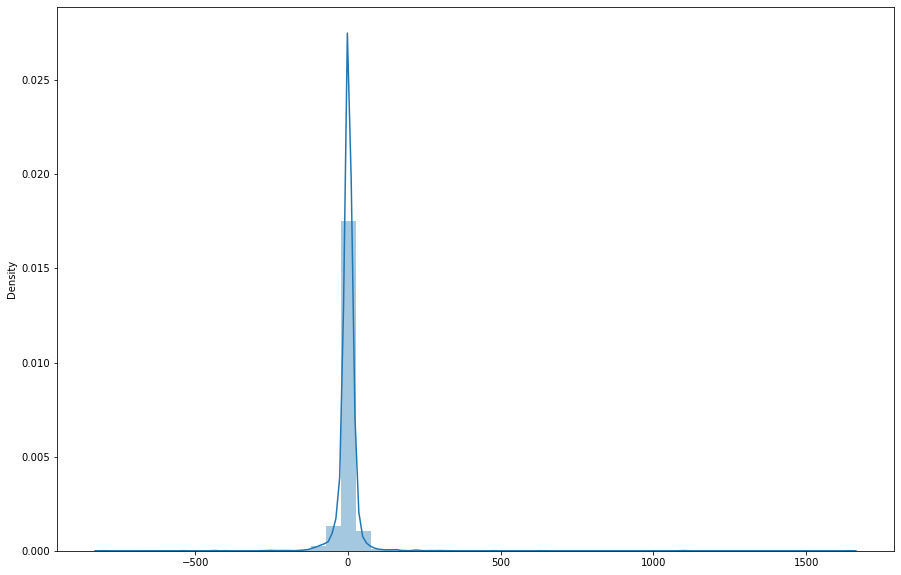

In [118]:
sns.distplot(model.resid)
plt.show()

In [119]:
from scipy import stats
x = model.resid       # Fitness test
stats.shapiro(x)

C:\Users\myks7\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.4081939458847046, pvalue=0.0)

In [120]:
stats.jarque_bera(model.resid)

Jarque_beraResult(statistic=77797518.0535539, pvalue=0.0)

#### Lets reduce the length of column location

In [121]:
len(df5.location.unique())

765

In [122]:
df5.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672.0,3.0,2.0,150.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750.0,3.0,3.0,149.0,3,8514.285714


In [123]:
df7 = df5.copy()

In [124]:
location_stats = df7['location'].value_counts(ascending=False)

In [125]:
len(location_stats[location_stats>10])

170

In [126]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Bannerghatta                           10
Mico Layout                            10
Kadubeesanahalli                       10
Kereguddadahalli                       10
Kaggalipura                            10
Kasturi Nagar                          10
Billekahalli                           10
Rajiv Nagar                            10
Basavangudi                            10
Banashankari Stage VI                  10
Cunningham Road                        10
Gollarapalya Hosahalli                 10
Dommasandra                            10
Prithvi Layout                          9
Bommenahalli                            9
Sultan Palaya                           9
Dasanapura                              9
Judicial Layout                         9
Cooke Town                              9
Benson Town                             9
LB Shastri Nagar                        9
Kothannur                               9
Nehru Nagar                             9
Kodihalli                         

In [127]:
df7.location = df7.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df7.location.unique())

171

In [128]:
df7.location.value_counts()

other                          1877
Whitefield                      246
Sarjapur  Road                  195
Electronic City                 161
Raja Rajeshwari Nagar           140
Uttarahalli                     120
Haralur Road                    117
Marathahalli                    116
Bannerghatta Road               109
Hennur Road                     109
Thanisandra                     103
Hebbal                           99
Kanakpura Road                   94
Electronic City Phase II         93
Yelahanka                        87
7th Phase JP Nagar               86
Bellandur                        73
KR Puram                         65
Chandapura                       62
Harlur                           60
Sarjapur                         58
Banashankari                     54
Kasavanhalli                     53
Begur Road                       52
Rajaji Nagar                     50
Kothanur                         49
Hormavu                          48
Jakkur                      

In [129]:
dummies2 = pd.get_dummies(df7.location, drop_first = True)
dummies2.head()

,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banaswadi,Bannerghatta Road,Battarahalli,Begur,Begur Road,Bellandur,Bhoganhalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkalasandra,Choodasandra,Devanahalli,Dodda Nekkundi,Doddathoguru,Domlur,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,Garudachar Palya,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jigani,KR Puram,Kadugodi,Kaggadasapura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Kasavanhalli,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kodichikkanahalli,Kodigehaali,Kogilu,Koramangala,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Munnekollal,Murugeshpalya,Mysore Road,Nagarbhavi,Nagavara,Neeladri Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 7 HSR Layout,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
dummies2.shape

(7534, 170)

In [131]:
df7.shape

(7534, 10)

In [132]:
df8 = pd.concat([df7,dummies2],axis='columns')
df8.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banaswadi,Bannerghatta Road,Battarahalli,Begur,Begur Road,Bellandur,Bhoganhalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkalasandra,Choodasandra,Devanahalli,Dodda Nekkundi,Doddathoguru,Domlur,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,Garudachar Palya,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jigani,KR Puram,Kadugodi,Kaggadasapura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Kasavanhalli,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kodichikkanahalli,Kodigehaali,Kogilu,Koramangala,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Munnekollal,Murugeshpalya,Mysore Road,Nagarbhavi,Nagavara,Neeladri Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 7 HSR Layout,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,Super built-up Area,Ready To Move,other,3 BHK,1672.0,3.0,2.0,150.0,3,8971.291866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Built-up Area,Ready To Move,other,3 BHK,1750.0,3.0,3.0,149.0,3,8514.285714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [133]:
print(df8.shape)

(7534, 180)


In [134]:
cat_var = df8.select_dtypes(include = "O").drop(["location"], axis = 1)
cat_var.head()

,area_type,availability,size
0,Super built-up Area,Ready To Move,3 BHK
1,Built-up Area,Ready To Move,3 BHK
2,Super built-up Area,Ready To Move,3 BHK
4,Super built-up Area,Ready To Move,2 BHK
5,Plot Area,Ready To Move,2 Bedroom


In [135]:
df9 = pd.get_dummies(cat_var, drop_first = True)
df9.shape

(7534, 24)

In [136]:
df10 = pd.concat([df9, df8], axis = 1)

In [137]:
df10.columns

Index(['area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'availability_Immediate Possession',
       'availability_Ready To Move', 'size_1 Bedroom', 'size_1 RK',
       'size_10 BHK', 'size_2 BHK', 'size_2 Bedroom',
       ...
       'Varthur', 'Vidyaranyapura', 'Vijayanagar', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yeshwanthpur',
       'other'],
      dtype='object', length=204)

In [138]:
df10.select_dtypes(include = "O").columns

Index(['area_type', 'availability', 'location', 'size'], dtype='object')

In [139]:
df10.drop(['area_type', 'availability', 'location', 'size'], axis = 1, inplace = True)

In [140]:
df10.shape

(7534, 200)

In [141]:
df10.head()

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Immediate Possession,availability_Ready To Move,size_1 Bedroom,size_1 RK,size_10 BHK,size_2 BHK,size_2 Bedroom,size_3 BHK,size_3 Bedroom,size_4 BHK,size_4 Bedroom,size_5 BHK,size_5 Bedroom,size_6 BHK,size_6 Bedroom,size_7 BHK,size_7 Bedroom,size_8 BHK,size_8 Bedroom,size_9 BHK,size_9 Bedroom,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banaswadi,Bannerghatta Road,Battarahalli,Begur,Begur Road,Bellandur,Bhoganhalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkalasandra,Choodasandra,Devanahalli,Dodda Nekkundi,Doddathoguru,Domlur,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,Garudachar Palya,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jigani,KR Puram,Kadugodi,Kaggadasapura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Kasavanhalli,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kodichikkanahalli,Kodigehaali,Kogilu,Koramangala,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Munnekollal,Murugeshpalya,Mysore Road,Nagarbhavi,Nagavara,Neeladri Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 7 HSR Layout,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1672.0,3.0,2.0,150.0,3,8971.291866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1750.0,3.0,3.0,149.0,3,8514.285714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1750.0,3.0,2.0,150.0,3,8571.428571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1250.0

#### Lets Build Model now

In [142]:
X = df10.drop(["price"], axis = 1)
y = df10[["price"]]

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [144]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8059219985595281

In [145]:
print('Train Score:',lr_clf.score(X_train,y_train))
print('Test Score:',lr_clf.score(X_test,y_test))


Train Score: 0.8830576520413586
Test Score: 0.8059219985595281


In [146]:
pred = lr_clf.fit(X_train,y_train).predict(X_train)
pred

array([[ 59.88298969],
       [ -9.56659426],
       [154.37318418],
       ...,
       [107.21203247],
       [269.70855973],
       [ 77.07015729]])

In [147]:
pd.DataFrame(lr_clf.predict(X_test)).head()

,0
0,61.140543
1,441.158832
2,550.088693
3,90.910981
4,72.378989


In [148]:
pd.DataFrame(pred).head()

,0
0,59.882990
1,-9.566594
2,154.373184
3,57.141366
4,65.364623


In [149]:
lr_clf.fit(X_train,y_train).coef_

array([[-8.20782807e+00,  4.96141709e+00,  2.39059349e-01,
        -6.14887789e+01, -4.13983127e+00, -3.59380503e+01,
         2.73399048e+00, -6.40568891e+01, -4.19359849e+00,
        -4.76142816e+01, -1.45168573e+01, -3.75957494e+01,
        -5.02437934e+00, -3.62763576e+01,  4.09771035e+01,
        -2.12111328e+01, -2.39043878e+01, -4.60473418e+01,
         2.75216460e+02, -1.35034852e+01, -5.15449128e+00,
         4.82660722e+01, -8.47692453e+01, -9.68186519e+00,
         8.30002886e-02,  1.56179853e+00, -4.48188199e-01,
        -1.06920418e+01,  2.57128319e-02, -4.01110650e+01,
        -1.89887819e+01, -3.45331116e+01, -3.16839381e+01,
        -1.37392030e+01, -1.67649326e+01,  2.94387948e+00,
        -1.45539632e+01, -3.01399024e+01, -3.48383655e+01,
        -1.18152076e+01,  6.60832373e+00,  2.26722999e+01,
         2.83303674e+01,  4.76049937e+00, -2.72595088e+01,
        -1.82563382e+01,  3.10237720e+01, -3.36487237e+01,
        -1.22564066e+01,  3.04882112e-01, -3.68947871e+0

In [150]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.88172378, 0.79911029, 0.85142314, 0.89145888, 0.88325889])

In [151]:
print(lr_clf.intercept_)

print(zip(X,lr_clf.coef_ ))

[-124.47696472]


In [152]:
y_predict = lr_clf.predict(X_test)

In [153]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, y_predict))
print(metrics.mean_squared_error(y_test, y_predict))
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

17.88969407930148
3078.7527292427367
55.486509434661116


#### Now my accuracy is really good than prervious one

In [154]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=5)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)
    

,model,best_score,best_params
0,linear_regression,0.837111,{'normalize': True}
1,lasso,0.823982,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.941281,"{'criterion': 'mse', 'splitter': 'best'}"


In [155]:
## Ridge

from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train,y_train)
print('Train Score:',model.score(X_train,y_train))
print('Test Score:',model.score(X_test,y_test))


Train Score: 0.8827452574411194
Test Score: 0.8065232361135724


In [156]:
## Elastic net

from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv = 10 ,
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

cv_model.fit(X_train,y_train)

print('Optimal alpha: ',cv_model.alpha_)
print('Optimal l1_ratio: ',cv_model.l1_ratio_)
print('Number of iterations',cv_model.n_iter_)


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Optimal alpha:  0.0024400250513121344
Optimal l1_ratio:  1.0
Number of iterations 77


In [157]:
print("Training Score:", cv_model.score(X_train,y_train))
print("Testing Score:", cv_model.score(X_test,y_test))

Training Score: 0.8823351312293299
Testing Score: 0.8048156674042122


In [158]:
## Comparing performance of all models:

from prettytable import PrettyTable
x = PrettyTable(["Model", "Train Score", "Test Score"])

x.add_row(['Simple LR',0.88,0.80])

x.add_row(['Ridge LR',0.88,0.80])
x.add_row(['Elastic LR',0.88,0.80])

print(x)

+------------+-------------+------------+
|   Model    | Train Score | Test Score |
+------------+-------------+------------+
| Simple LR  |     0.88    |    0.8     |
|  Ridge LR  |     0.88    |    0.8     |
| Elastic LR |     0.88    |    0.8     |
+------------+-------------+------------+


In [159]:
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft
0,Super built-up Area,Ready To Move,other,3 BHK,1672.0,3.0,2.0,150.0,3,8971.291866
1,Built-up Area,Ready To Move,other,3 BHK,1750.0,3.0,3.0,149.0,3,8514.285714
2,Super built-up Area,Ready To Move,other,3 BHK,1750.0,3.0,2.0,150.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667


In [160]:
len(df7.location.value_counts())

171

In [161]:
df11 = df7.copy()

In [162]:
df11.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price', 'BHK_Bedroom', 'Price_per_sqft'],
      dtype='object')

In [163]:
col_names = ['total_sqft', 'bath','balcony','BHK_Bedroom', 'Price_per_sqft']
features = df11[col_names]

In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)


In [165]:
scaled_features.head()

,total_sqft,bath,balcony,BHK_Bedroom,Price_per_sqft
0,0.188092,0.582716,0.587927,0.569529,1.122264
1,0.271604,0.582716,1.877429,0.569529,0.950568
2,0.271604,0.582716,0.587927,0.569529,0.972036
3,-0.263728,-0.450268,0.587927,-0.561125,-1.045996
4,-0.317261,-0.450268,0.587927,-0.561125,0.350346


In [166]:
df12 = df10.copy()
df12.head()

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Immediate Possession,availability_Ready To Move,size_1 Bedroom,size_1 RK,size_10 BHK,size_2 BHK,size_2 Bedroom,size_3 BHK,size_3 Bedroom,size_4 BHK,size_4 Bedroom,size_5 BHK,size_5 Bedroom,size_6 BHK,size_6 Bedroom,size_7 BHK,size_7 Bedroom,size_8 BHK,size_8 Bedroom,size_9 BHK,size_9 Bedroom,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banaswadi,Bannerghatta Road,Battarahalli,Begur,Begur Road,Bellandur,Bhoganhalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkalasandra,Choodasandra,Devanahalli,Dodda Nekkundi,Doddathoguru,Domlur,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,Garudachar Palya,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jigani,KR Puram,Kadugodi,Kaggadasapura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Kasavanhalli,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kodichikkanahalli,Kodigehaali,Kogilu,Koramangala,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Munnekollal,Murugeshpalya,Mysore Road,Nagarbhavi,Nagavara,Neeladri Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 7 HSR Layout,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1672.0,3.0,2.0,150.0,3,8971.291866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1750.0,3.0,3.0,149.0,3,8514.285714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1750.0,3.0,2.0,150.0,3,8571.428571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1250.0

In [167]:
X1 = df12.drop(["price"], axis = 1)
y1 = df12[["price"]]

In [168]:
scale= StandardScaler()
scaled_data = scale.fit_transform(X1) 

In [169]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(scaled_data,y1,test_size=0.3,random_state=10)

In [170]:
from sklearn.linear_model import LinearRegression
Regression = LinearRegression()
Regression.fit(X1_train,y1_train)
Regression.score(X1_test,y1_test)

0.8312139166464869

In [171]:
print('Train Score:',Regression.score(X1_train,y1_train))
print('Test Score:',Regression.score(X1_test,y1_test))

Train Score: 0.8814826442334345
Test Score: 0.8312139166464869


In [172]:
y1_predict = Regression.predict(X1_test)

In [173]:
from sklearn import metrics

print(metrics.mean_absolute_error(y1_test, y1_predict))
print(metrics.mean_squared_error(y1_test, y1_predict))
print(np.sqrt(metrics.mean_squared_error(y1_test, y1_predict)))

17.229835162016236
2663.566301464811
51.60975006202618


#### Try with removing one feature  "size"

In [174]:
df8.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banaswadi,Bannerghatta Road,Battarahalli,Begur,Begur Road,Bellandur,Bhoganhalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkalasandra,Choodasandra,Devanahalli,Dodda Nekkundi,Doddathoguru,Domlur,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,Garudachar Palya,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jigani,KR Puram,Kadugodi,Kaggadasapura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Kasavanhalli,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kodichikkanahalli,Kodigehaali,Kogilu,Koramangala,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Munnekollal,Murugeshpalya,Mysore Road,Nagarbhavi,Nagavara,Neeladri Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 7 HSR Layout,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,Super built-up Area,Ready To Move,other,3 BHK,1672.0,3.0,2.0,150.0,3,8971.291866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Built-up Area,Ready To Move,other,3 BHK,1750.0,3.0,3.0,149.0,3,8514.285714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Super built-up Area,Ready To Move,other,3 BHK,1750.0,3.0,2.0,150.0,3,8571.428571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [175]:
df13 = df8.copy()

In [176]:
df13.drop(["size","location"], axis = 1, inplace = True)

In [177]:
df13.head()

,area_type,availability,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banaswadi,Bannerghatta Road,Battarahalli,Begur,Begur Road,Bellandur,Bhoganhalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkalasandra,Choodasandra,Devanahalli,Dodda Nekkundi,Doddathoguru,Domlur,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,Garudachar Palya,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jigani,KR Puram,Kadugodi,Kaggadasapura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Kasavanhalli,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kodichikkanahalli,Kodigehaali,Kogilu,Koramangala,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Munnekollal,Murugeshpalya,Mysore Road,Nagarbhavi,Nagavara,Neeladri Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 7 HSR Layout,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,Super built-up Area,Ready To Move,1672.0,3.0,2.0,150.0,3,8971.291866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Built-up Area,Ready To Move,1750.0,3.0,3.0,149.0,3,8514.285714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Super built-up Area,Ready To Move,1750.0,3.0,2.0,150.0,3,8571.428571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Super built-up Area,Ready To Move,1250.0,2.0,2.0,40.0,2,3200.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Plot Area,Ready To Move,1200.0,2.0,2.0,83.0,2,6

In [190]:
cat_feats = df13.select_dtypes(include = "O" )

In [191]:
cat_feats.head()

,area_type,availability
0,Super built-up Area,Ready To Move
1,Built-up Area,Ready To Move
2,Super built-up Area,Ready To Move
4,Super built-up Area,Ready To Move
5,Plot Area,Ready To Move


In [192]:
dummies_var = pd.get_dummies(cat_feats)

In [196]:
print(dummies_var.shape)

(7534, 7)


In [197]:
df13 = pd.concat([dummies_var, df13], axis = 1)

In [198]:
df13.head()

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Finish soon,availability_Immediate Possession,availability_Ready To Move,area_type,availability,total_sqft,bath,balcony,price,BHK_Bedroom,Price_per_sqft,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banaswadi,Bannerghatta Road,Battarahalli,Begur,Begur Road,Bellandur,Bhoganhalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkalasandra,Choodasandra,Devanahalli,Dodda Nekkundi,Doddathoguru,Domlur,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,Garudachar Palya,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jigani,KR Puram,Kadugodi,Kaggadasapura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Kasavanhalli,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kodichikkanahalli,Kodigehaali,Kogilu,Koramangala,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Munnekollal,Murugeshpalya,Mysore Road,Nagarbhavi,Nagavara,Neeladri Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 7 HSR Layout,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,1,0,0,1,Super built-up Area,Ready To Move,1672.0,3.0,2.0,150.0,3,8971.291866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,Built-up Area,Ready To Move,1750.0,3.0,3.0,149.0,3,8514.285714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,Super built-up Area,Ready To Move,1750.0,3.0,2.0,150.0,3,8571.428571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,Super built-up Area,Ready To Move,1250.0,2.0,2.0,40.0,2,3200.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [199]:
df13.drop(["area_type", "availability"], axis = 1, inplace = True)

In [200]:
df13.shape

(7534, 183)

In [201]:
X2 = df13.drop(["price"], axis = 1)
y2 = df13[["price"]]

In [202]:
scale= StandardScaler()
scaled_data1 = scale.fit_transform(X2) 

In [203]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(scaled_data1,y2,test_size=0.3,random_state=10)

In [204]:
from sklearn.linear_model import LinearRegression
Regression = LinearRegression()
Regression.fit(X2_train,y2_train)
Regression.score(X2_test,y2_test)

0.8303098506191172

In [205]:
print('Train Score:',Regression.score(X2_train,y2_train))
print('Test Score:',Regression.score(X2_test,y2_test))


Train Score: 0.8739565663366269
Test Score: 0.8303098506191172


In [207]:
y2_predict = Regression.predict(X2_test)

In [208]:
print(metrics.mean_absolute_error(y2_test, y2_predict))
print(metrics.mean_squared_error(y2_test, y2_predict))
print(np.sqrt(metrics.mean_squared_error(y2_test, y2_predict)))

17.33782919076022
2677.8331163405232
51.74778368529925


In [209]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv = 10 ,
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

cv_model.fit(X2_train,y2_train)

print('Optimal alpha: ',cv_model.alpha_)
print('Optimal l1_ratio: ',cv_model.l1_ratio_)
print('Number of iterations',cv_model.n_iter_)


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Optimal alpha:  0.0012880205613935766
Optimal l1_ratio:  0.995
Number of iterations 35


In [210]:
print("Training Score:", cv_model.score(X2_train,y2_train))
print("Testing Score:", cv_model.score(X2_test,y2_test))

Training Score: 0.8718001479217777
Testing Score: 0.8218743776537729


In [243]:
y_pr = cv_model.predict(X2_test)
y_pr

array([ 57.41759251, 431.5914466 , 547.95823051, ...,  72.82217341,
        37.8130422 ,  47.8492783 ])

In [245]:
print(metrics.mean_absolute_error(y2_test, y_pr))
print(metrics.mean_squared_error(y2_test, y_pr))
print(np.sqrt(metrics.mean_squared_error(y2_test, y_pr)))

16.163243829178246
2810.9509722738794
53.01840220408268


In [211]:
## Ridge

from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X2_train,y2_train)
print('Train Score:',model.score(X2_train,y2_train))
print('Test Score:',model.score(X2_test,y2_test))

Train Score: 0.8739589110237735
Test Score: 0.830221372459244


In [238]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostRegressor


# Create adaboost classifer object
abc = AdaBoostRegressor(n_estimators=10, learning_rate=1, random_state=5)

# Train Adaboost Classifer
model1 = abc.fit(X2_train, y2_train)


#Predict the response for test dataset
y_pred = model1.predict(X2_test)

C:\Users\myks7\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [239]:
y_pred

array([ 71.28157729, 559.03370787, 697.87969925, ...,  71.28157729,
        71.28157729,  71.28157729])

In [240]:
print('Train Score:',model1.score(X2_train,y2_train))
print('Test Score:',model1.score(X2_test,y2_test))

Train Score: 0.8972655780281388
Test Score: 0.8786255032520939


In [241]:
print(metrics.mean_absolute_error(y2_test, y_pred))
print(metrics.mean_squared_error(y2_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y2_test, y_pred)))

28.849342687848765
1915.3772216982022
43.76502281158096


In [248]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(max_depth=5).fit(X2_train,y2_train)

In [249]:
#Predict the response for test dataset
Y_pred = model2.predict(X2_test)

In [250]:
Y_pred

array([ 72.20833571, 384.93902439, 550.        , ...,  70.82187708,
        47.34972548,  47.34972548])

In [251]:
print('Train Score:',model2.score(X2_train,y2_train))
print('Test Score:',model2.score(X2_test,y2_test))

Train Score: 0.9611862588943063
Test Score: 0.9547257274869481


In [252]:
print(metrics.mean_absolute_error(y2_test, Y_pred))
print(metrics.mean_squared_error(y2_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(y2_test, Y_pred)))

13.454997364939834
714.4607197059523
26.729398042341924


In [254]:
from sklearn.ensemble import RandomForestRegressor

In [276]:
reg_rf = RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25)
reg_rf.fit(X2_train, y2_train)
y_pred3= reg_rf.predict(X2_test)

print("Accuracy on Traing set: ",reg_rf.score(X2_train,y2_train))

<ipython-input-276-89a8ecbd047e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rf.fit(X2_train, y2_train)


Accuracy on Traing set:  0.9706249737570534


In [277]:
y_pred3

array([ 54.22593436, 521.5566279 , 494.37865282, ...,  74.26603749,
        46.29421141,  54.49395273])

In [278]:
print('Train Score:',reg_rf.score(X2_train,y2_train))
print('Test Score:',reg_rf.score(X2_test,y2_test))

Train Score: 0.9706249737570534
Test Score: 0.8410415510575598


In [279]:
print(metrics.mean_absolute_error(y2_test, y_pred3))
print(metrics.mean_squared_error(y2_test, y_pred3))
print(np.sqrt(metrics.mean_squared_error(y2_test, y_pred3)))

11.229023711504373
2508.4791324259727
50.0847195502378


In [280]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 40)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20,25,30,35,40,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X2_train, y2_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33, total=   6.6s
[CV] n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s
C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33, total=   6.5s
[CV] n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33, total=   7.0s
[CV] n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33, total=   6.4s
[CV] n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1805, min_samples_split=20, min_samples_leaf=10, max_features=sqrt, max_depth=33, total=   6.4s
[CV] n_estimators=1074, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1074, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5, total=  15.2s
[CV] n_estimators=1074, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1074, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5, total=  14.2s
[CV] n_estimators=1074, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1074, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5, total=  14.5s
[CV] n_estimators=1074, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1074, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5, total=  14.0s
[CV] n_estimators=1074, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1074, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=5, total=  14.3s
[CV] n_estimators=1561, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1561, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=12, total=   5.5s
[CV] n_estimators=1561, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1561, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=12, total=   5.4s
[CV] n_estimators=1561, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1561, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=12, total=   5.5s
[CV] n_estimators=1561, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1561, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=12, total=   5.7s
[CV] n_estimators=1561, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1561, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=12, total=   5.6s
[CV] n_estimators=294, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=294, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=26, total=   1.4s
[CV] n_estimators=294, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=294, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=26, total=   1.6s
[CV] n_estimators=294, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=294, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=26, total=   1.5s
[CV] n_estimators=294, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=294, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=26, total=   1.7s
[CV] n_estimators=294, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=294, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=26, total=   1.6s
[CV] n_estimators=294, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=294, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=26, total=   2.0s
[CV] n_estimators=294, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=294, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=26, total=   2.0s
[CV] n_estimators=294, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=294, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=26, total=   1.7s
[CV] n_estimators=294, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=294, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=26, total=   1.9s
[CV] n_estimators=294, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=294, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=26, total=   1.8s
[CV] n_estimators=1317, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1317, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=12, total=   4.8s
[CV] n_estimators=1317, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1317, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=12, total=   4.7s
[CV] n_estimators=1317, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1317, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=12, total=   4.6s
[CV] n_estimators=1317, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1317, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=12, total=   4.2s
[CV] n_estimators=1317, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1317, min_samples_split=30, min_samples_leaf=10, max_features=sqrt, max_depth=12, total=   4.0s
[CV] n_estimators=587, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=40 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=587, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=40, total=  12.6s
[CV] n_estimators=587, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=40 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=587, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=40, total=  12.7s
[CV] n_estimators=587, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=40 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=587, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=40, total=  12.7s
[CV] n_estimators=587, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=40 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=587, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=40, total=  12.3s
[CV] n_estimators=587, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=40 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=587, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=40, total=  12.0s
[CV] n_estimators=1366, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1366, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=12, total=  26.1s
[CV] n_estimators=1366, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1366, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=12, total=  24.9s
[CV] n_estimators=1366, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1366, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=12, total=  27.5s
[CV] n_estimators=1366, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1366, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=12, total=  26.8s
[CV] n_estimators=1366, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=12 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1366, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=12, total=  26.3s
[CV] n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33, total=  10.4s
[CV] n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33, total=  10.6s
[CV] n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33, total=  10.3s
[CV] n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33, total=  10.4s
[CV] n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1220, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=33, total=  10.1s
[CV] n_estimators=246, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=246, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=26, total=   1.3s
[CV] n_estimators=246, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=246, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=26, total=   1.3s
[CV] n_estimators=246, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=246, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=26, total=   1.5s
[CV] n_estimators=246, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=246, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=26, total=   1.6s
[CV] n_estimators=246, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=26 


C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=246, min_samples_split=20, min_samples_leaf=1, max_features=sqrt, max_depth=26, total=   1.4s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.1min finished
C:\Users\myks7\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=25,
                                                   max_features='sqrt',
                                                   n_estimators=1000),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 12, 19, 26, 33, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25, 30, 35, 40,
                                                              100],
                                        'n_estimators': [100, 148, 197, 246,
                                                         294, 343, 392, 441,
                                                         489, 538, 587, 635,
                                                      

In [281]:
rf_random.best_params_

{'n_estimators': 587,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 40}

In [282]:
reg_rf = RandomForestRegressor(n_estimators=587,min_samples_split=5,min_samples_leaf=5,max_features='auto',max_depth=40)
reg_rf.fit(X2_train, y2_train)
y_pred3= reg_rf.predict(X2_test)

print("Accuracy on Traing set: ",reg_rf.score(X2_train,y2_train))

<ipython-input-282-fda333a1cfee>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rf.fit(X2_train, y2_train)


Accuracy on Traing set:  0.9326214376845547


In [283]:
print('Train Score:',reg_rf.score(X2_train,y2_train))
print('Test Score:',reg_rf.score(X2_test,y2_test))

Train Score: 0.9326214376845547
Test Score: 0.879891476023636


In [284]:
print(metrics.mean_absolute_error(y2_test, y_pred3))
print(metrics.mean_squared_error(y2_test, y_pred3))
print(np.sqrt(metrics.mean_squared_error(y2_test, y_pred3)))

3.9185679722393534
1895.3992570114501
43.53618330781248


In [288]:
import xgboost as XGB

xgb_model = XGB.XGBRegressor()
xgb_model.fit(X2_train, y2_train)
y_pred_xgb= xgb_model.predict(X2_test)

print("Accuracy on Traing set: ",xgb_model.score(X2_train, y2_train))



Accuracy on Traing set:  0.9998575342417392


In [289]:
print('Train Score:',xgb_model.score(X2_train,y2_train))
print('Test Score:',xgb_model.score(X2_test,y2_test))

Train Score: 0.9998575342417392
Test Score: 0.9622085325466192


In [290]:
print(metrics.mean_absolute_error(y2_test, y_pred_xgb))
print(metrics.mean_squared_error(y2_test, y_pred_xgb))
print(np.sqrt(metrics.mean_squared_error(y2_test, y_pred_xgb)))

3.4529879652425706
596.3766513907576
24.420824134143334


In [291]:
learning_rate = [0.01, 0.1]
max_depth = [int(x) for x in np.linspace(5, 40, num = 6)]
min_child_weight = [int(x) for x in np.linspace(1, 20, num = 6)]
subsample =  [0.5, 0.7]
colsample_bytree = [0.5, 0.7]
objective = ['reg:squarederror']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 40)]


random_grid = {'learning_rate': learning_rate,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'objective': objective,
               'n_estimators': n_estimators}


rf_random = RandomizedSearchCV(estimator = xgb_model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X2_train,y2_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.5, objective=reg:squarederror, n_estimators=1805, min_child_weight=1, max_depth=26, learning_rate=0.01, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, objective=reg:squarederror, n_estimators=1805, min_child_weight=1, max_depth=26, learning_rate=0.01, colsample_bytree=0.7, total=  39.8s
[CV] subsample=0.5, objective=reg:squarederror, n_estimators=1805, min_child_weight=1, max_depth=26, learning_rate=0.01, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s remaining:    0.0s


[CV]  subsample=0.5, objective=reg:squarederror, n_estimators=1805, min_child_weight=1, max_depth=26, learning_rate=0.01, colsample_bytree=0.7, total=  39.4s
[CV] subsample=0.5, objective=reg:squarederror, n_estimators=1805, min_child_weight=1, max_depth=26, learning_rate=0.01, colsample_bytree=0.7 
[CV]  subsample=0.5, objective=reg:squarederror, n_estimators=1805, min_child_weight=1, max_depth=26, learning_rate=0.01, colsample_bytree=0.7, total=  36.5s
[CV] subsample=0.5, objective=reg:squarederror, n_estimators=1805, min_child_weight=1, max_depth=26, learning_rate=0.01, colsample_bytree=0.7 
[CV]  subsample=0.5, objective=reg:squarederror, n_estimators=1805, min_child_weight=1, max_depth=26, learning_rate=0.01, colsample_bytree=0.7, total=  36.7s
[CV] subsample=0.5, objective=reg:squarederror, n_estimators=1805, min_child_weight=1, max_depth=26, learning_rate=0.01, colsample_bytree=0.7 
[CV]  subsample=0.5, objective=reg:squarederror, n_estimators=1805, min_child_weight=1, max_depth

[CV]  subsample=0.5, objective=reg:squarederror, n_estimators=1415, min_child_weight=20, max_depth=40, learning_rate=0.1, colsample_bytree=0.5, total=  13.2s
[CV] subsample=0.7, objective=reg:squarederror, n_estimators=684, min_child_weight=1, max_depth=12, learning_rate=0.01, colsample_bytree=0.7 
[CV]  subsample=0.7, objective=reg:squarederror, n_estimators=684, min_child_weight=1, max_depth=12, learning_rate=0.01, colsample_bytree=0.7, total=   6.9s
[CV] subsample=0.7, objective=reg:squarederror, n_estimators=684, min_child_weight=1, max_depth=12, learning_rate=0.01, colsample_bytree=0.7 
[CV]  subsample=0.7, objective=reg:squarederror, n_estimators=684, min_child_weight=1, max_depth=12, learning_rate=0.01, colsample_bytree=0.7, total=   7.4s
[CV] subsample=0.7, objective=reg:squarederror, n_estimators=684, min_child_weight=1, max_depth=12, learning_rate=0.01, colsample_bytree=0.7 
[CV]  subsample=0.7, objective=reg:squarederror, n_estimators=684, min_child_weight=1, max_depth=12, l

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 12.4min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_par...
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [5, 12, 19, 26, 33, 40],

In [294]:
rf_random.best_params_

{'subsample': 0.5,
 'objective': 'reg:squarederror',
 'n_estimators': 1805,
 'min_child_weight': 1,
 'max_depth': 26,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7}

In [293]:
import xgboost as XGB

xgb_model = XGB.XGBRegressor(subsample=0.5, objective='reg:squarederror', n_estimators=1805, 
                             min_child_weight=1, max_depth=26, learning_rate=0.01, 
                             colsample_bytree=0.7)
xgb_model.fit(X2_train, y2_train)
y_pred_xgb= xgb_model.predict(X2_test)

print("Accuracy on Traing set: ",xgb_model.score(X2_train, y2_train))

Accuracy on Traing set:  0.9999491503744025


In [295]:
print('Train Score:',xgb_model.score(X2_train,y2_train))
print('Test Score:',xgb_model.score(X2_test,y2_test))

Train Score: 0.9999491503744025
Test Score: 0.9685872920794747


In [296]:
print(metrics.mean_absolute_error(y2_test, y_pred_xgb))
print(metrics.mean_squared_error(y2_test, y_pred_xgb))
print(np.sqrt(metrics.mean_squared_error(y2_test, y_pred_xgb)))

3.543472562888617
495.7152188881949
22.264663008637587
